<a href="https://colab.research.google.com/github/Dhairyaxshah/Appfluence/blob/main/notebooks/02_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

google_cleaned_url = "https://raw.githubusercontent.com/Dhairyaxshah/Appfluence/main/data/google_play_cleaned.csv"
apple_cleaned_url  = "https://raw.githubusercontent.com/Dhairyaxshah/Appfluence/main/data/apple_store_cleaned.csv"

df1 = pd.read_csv(google_cleaned_url)
df2 = pd.read_csv(apple_cleaned_url)

**DATASET 1 - GOOGLE PLAY STORE**

**EDA Question 1: Market Structure by Category**

This analysis examines how apps are distributed across different categories
to understand market saturation and competition.


In [3]:
df1['Category'].value_counts().head(10)


,count
Category,
FAMILY,1608
GAME,912
TOOLS,718
FINANCE,302
PRODUCTIVITY,301
LIFESTYLE,301
PERSONALIZATION,298
MEDICAL,290
BUSINESS,263


<Axes: title={'center': 'Top 10 Categories by Number of Apps'}, xlabel='Category'>

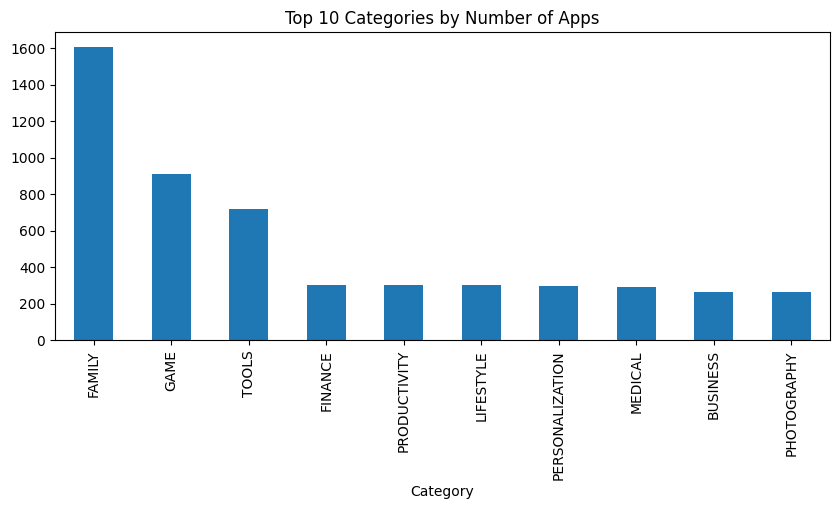

In [4]:
df1['Category'].value_counts().head(10).plot(
    kind='bar',
    figsize=(10,4),
    title='Top 10 Categories by Number of Apps'
)


**Insight:**

The Family category contains the highest number of apps in the Google Play Store,
followed by Games and Tools. This indicates that the Family category is highly
saturated, suggesting intense competition for visibility and user attention.
As a result, developers entering this category are likely to face greater
competitive pressure compared to less crowded categories.


**EDA QUESTION 2: Are most Google Play apps free or paid?**

In [5]:
df1['Type'].value_counts()


,count
Type,
Free,7592
Paid,604


<Axes: title={'center': 'Free vs Paid Apps on Google Play'}, xlabel='Type'>

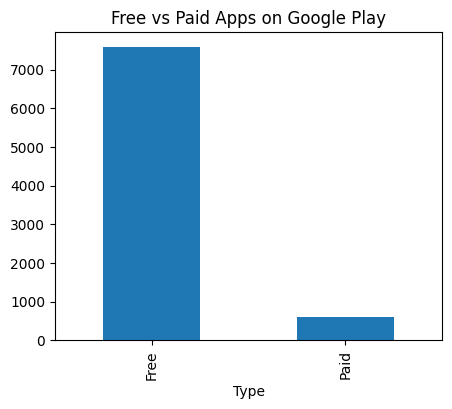

In [6]:
df1['Type'].value_counts().plot(
    kind='bar',
    figsize=(5,4),
    title='Free vs Paid Apps on Google Play'
)


**Insight:**

The Google Play Store is heavily dominated by free apps, with approximately 7,500 free apps compared to only around 600 paid apps. This indicates that developers largely adopt a free-to-access strategy, likely to maximize reach and user acquisition. As a result, app type (Free vs Paid) is an important factor to consider when analyzing popularity and building predictive models.


**EDA Question 3: How is popularity distributed?**

In [7]:
df1['Installs'].describe()

,Installs
count,8.196000e+03
mean,9.165090e+06
std,5.825087e+07
min,1.000000e+00
25%,1.000000e+04
50%,1.000000e+05
75%,1.000000e+06
max,1.000000e+09


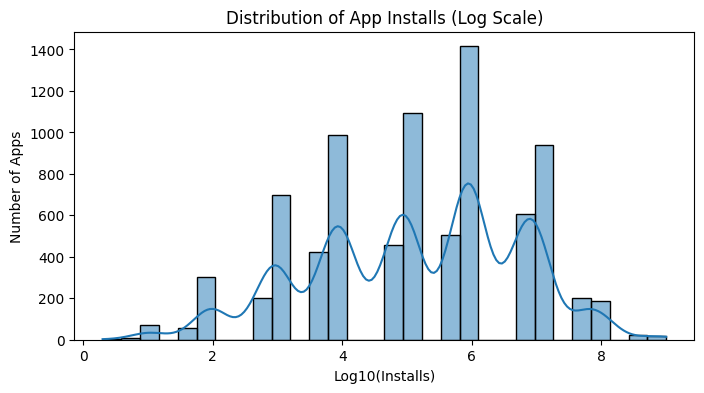

In [8]:
log_installs = np.log10(df1['Installs'] + 1)

plt.figure(figsize=(8,4))
sns.histplot(log_installs, bins=30, kde=True)log_installs = np.log10(df1['Installs'] + 1)

plt.figure(figsize=(8,4))
sns.histplot(log_installs, bins=30, kde=True)
plt.xlabel('Log10(Installs)')
plt.ylabel('Number of Apps')
plt.title('Distribution of App Installs (Log Scale)')
plt.show()
plt.xlabel('Log10(Installs)')
plt.ylabel('Number of Apps')
plt.title('Distribution of App Installs (Log Scale)')
plt.show()

**Insight:**

The distribution of app installs is highly right-skewed, indicating that while most apps receive relatively low install counts, a small number of apps achieve extremely high popularity. Applying a log transformation compresses these extreme values, reduces variance, and makes the distribution more interpretable. This transformation is essential for both analysis and machine learning, as it allows models to learn relative differences in app popularity without being dominated by a few highly downloaded apps.

**EDA Question 4: Do higher-rated apps actually get more installs?**

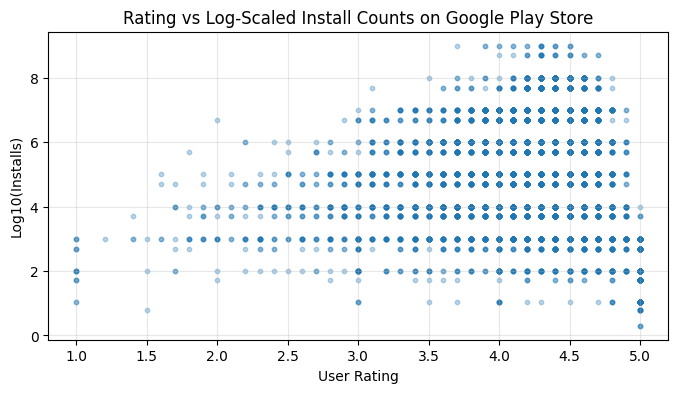

In [13]:
log_installs = np.log10(df1['Installs'] + 1)

plt.figure(figsize=(8,4))
plt.scatter(df1['Rating'], log_installs, alpha=0.3, s=10)
plt.grid(alpha=0.3)
plt.xlabel('User Rating')
plt.ylabel('Log10(Installs)')
plt.title('Rating vs Log-Scaled Install Counts on Google Play Store')
plt.show()

**Insight:**

The scatter plot shows a weak positive relationship between app ratings and install counts. While higher-rated apps are more likely to achieve higher installs, rating alone is not a strong predictor of popularity, as many highly rated apps still have low install counts. This suggests that additional factors such as category, pricing, and visibility play a significant role in app adoption.